In [6]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
# import ast, json
import matplotlib.pyplot as plt

automobile_data = pd.read_csv('automobile.txt')
print(automobile_data.head(10))
print(automobile_data.columns)
automobile_data.info() # getting an overview of all the columns and the data types. From it I can already some columns needs data changes and that some columns can be dropped


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd    

In [7]:
"""
Inspecting the columns that I could not see in the previous call (due to too many columns to show)"""
df_inspect_other = automobile_data[['length', 'width','height', 'curb-weight', 'engine-type','num-of-cylinders']]
df_inspect_other


,length,width,height,curb-weight,engine-type,num-of-cylinders
0,168.8,64.1,48.8,2548,dohc,four
1,168.8,64.1,48.8,2548,dohc,four
2,171.2,65.5,52.4,2823,ohcv,six
3,176.6,66.2,54.3,2337,ohc,four
4,176.6,66.4,54.3,2824,ohc,five
5,177.3,66.3,53.1,2507,ohc,five
6,192.7,71.4,55.7,2844,ohc,five
7,192.7,71.4,55.7,2954,ohc,five
8,192.7,71.4,55.9,3086,ohc,five
9,178.2,67.9,52.0,3053,ohc,five


AxesSubplot(0.125,0.125;0.698618x0.755)
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


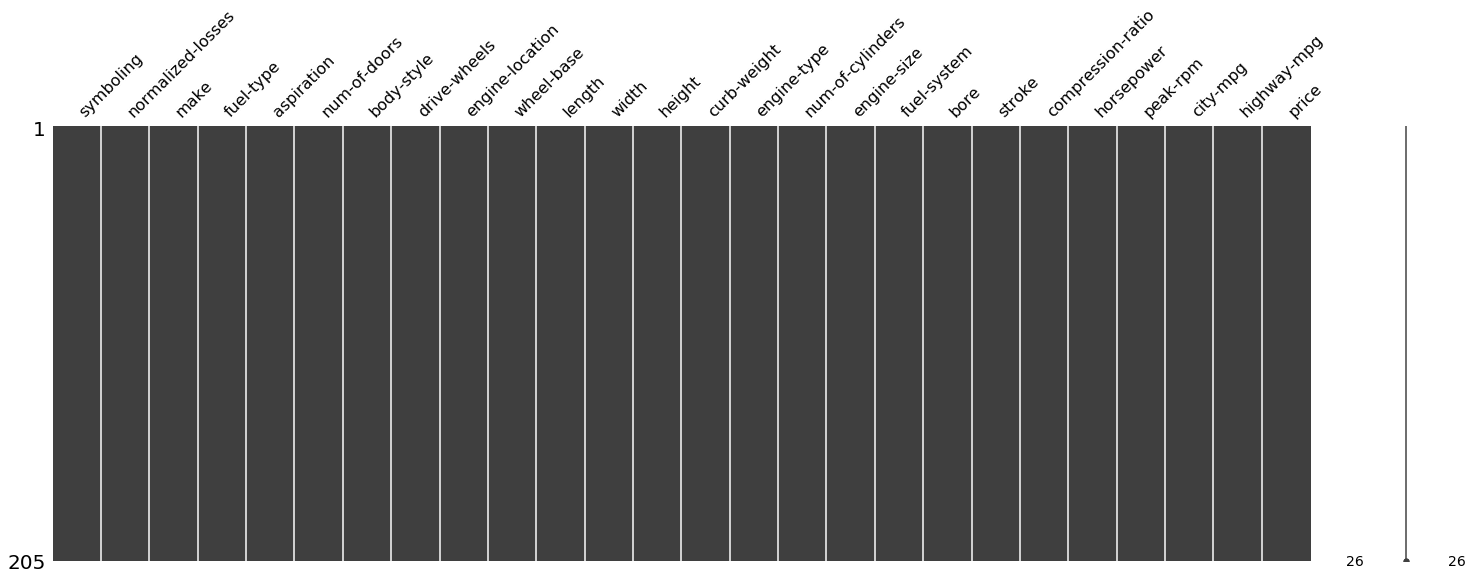

In [3]:
print(missingno.matrix(automobile_data, figsize = (25,8)))
"""
Reveals no missing data in the different columns
There is however ? within the "normalized losses" columns which will need to be dealt with (In the end I decided to drop this columns as I did not require it for my analysis)
"""

missing_values_count = automobile_data.isnull().sum()
print(missing_values_count) # no missing values but there is a few instances of '?' in the data

In [8]:
"""
dropping symboling and normilized losses columns
as I will not use this as part of my analyis
"""

automobile_data.drop(['symboling','normalized-losses'], axis=1, inplace=True)
print(automobile_data.head()) # inspecting that changes were made

          make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location  wheel-base  length  width  ...  engine-size  fuel-system  \
0           front        88.6   168.8   64.1  ...          130         mpfi   
1           front        88.6   168.8   64.1  ...          130         mpfi   
2           front        94.5   171.2   65.5  ...          152         mpfi   
3           front        99.8   176.6   66.2  ...          109         mpfi   
4           front        99.4   176.6   66.4  ...          136         mpfi   

   bore stroke  compression-ratio horsepower peak-rpm ci

In [9]:
# inspecting data where data changes are going to be made to see if any '?' strings
print(automobile_data[automobile_data['peak-rpm'] == '?'])
print(automobile_data[automobile_data['horsepower'] == '?'])
print(automobile_data[automobile_data['price'] == '?'])

# index 130 and 131 has some '?' values in the horsepower and peak-rpm columns
# index 9, 44, 45 and 129 has some '?' values in the price column

# removing the aforementioned indexes from the dataframe
automobile_data.drop(automobile_data.index[[9,44,45,129,130,131]], inplace = True) # i did not use imputation since price and horsepower will be influenced with average values and since they vary considerably between different vehicles

automobile_data.head(10) # inspecting to see if deletion was made (inspecting that index 9 was deleted in this case)
# due to small number of deletions I am of the view that deleting these rows wont ttruly affect the analysis (6/210 = 2.8%)

        make fuel-type aspiration num-of-doors body-style drive-wheels  \
130  renault       gas        std         four      wagon          fwd   
131  renault       gas        std          two  hatchback          fwd   

    engine-location  wheel-base  length  width  ...  engine-size  fuel-system  \
130           front        96.1   181.5   66.5  ...          132         mpfi   
131           front        96.1   176.8   66.6  ...          132         mpfi   

     bore stroke  compression-ratio horsepower peak-rpm city-mpg  highway-mpg  \
130  3.46   3.90                8.7          ?        ?       23           31   
131  3.46   3.90                8.7          ?        ?       23           31   

    price  
130  9295  
131  9895  

[2 rows x 24 columns]
        make fuel-type aspiration num-of-doors body-style drive-wheels  \
130  renault       gas        std         four      wagon          fwd   
131  renault       gas        std          two  hatchback          fwd   

    eng

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [10]:
# changing dtypes of the horsepower and price datatypes
automobile_data[['horsepower','price']] = automobile_data[['horsepower','price']].astype(np.int64)

In [11]:
automobile_data.info() # inspecting that the data changes were made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 24 columns):
make                 199 non-null object
fuel-type            199 non-null object
aspiration           199 non-null object
num-of-doors         199 non-null object
body-style           199 non-null object
drive-wheels         199 non-null object
engine-location      199 non-null object
wheel-base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb-weight          199 non-null int64
engine-type          199 non-null object
num-of-cylinders     199 non-null object
engine-size          199 non-null int64
fuel-system          199 non-null object
bore                 199 non-null object
stroke               199 non-null object
compression-ratio    199 non-null float64
horsepower           199 non-null int64
peak-rpm             199 non-null object
city-mpg             199 non-nul

In [12]:
# creating groupby for vehicle make and sorting according to average values

group_by_make = automobile_data.groupby(by=['make'])
group_by_make_average = group_by_make.mean()
group_by_make_average



,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
make,,,,,,,,,,,
alfa-romero,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,9.000000,125.333333,20.333333,26.666667,15498.333333
audi,102.733333,184.766667,68.850000,54.833333,2758.666667,130.666667,8.633333,114.500000,19.333333,24.500000,17859.166667
bmw,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,8.575000,138.875000,19.375000,25.375000,26118.750000
chevrolet,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,9.566667,62.666667,41.000000,46.333333,6007.000000
dodge,95.011111,160.988889,64.166667,51.644444,2151.333333,102.666667,8.634444,86.333333,28.000000,34.111111,7875.444444
honda,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,9.215385,80.230769,30.384615,35.461538,8184.692308
isuzu,95.150000,171.650000,63.500000,52.450000,2535.500000,115.000000,8.850000,84.000000,24.000000,29.000000,8916.500000
jaguar,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,9.233333,204.666667,14.333333,18.333333,34600.000000
mazda,97.017647,170.805882,65.588235,53.358824,2297.823529,103.000000,10.488235,85.529412,25.705882,31.941176,10652.882353


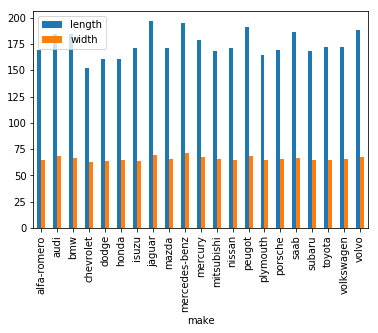

In [13]:
# bar plot to show relationship between car lenth and width averages (if they are quite similar between makes)
features_of_interest = pd.DataFrame({'length': group_by_make_average['length'],
                                     'width': group_by_make_average['width'],
                                   }
                                   )
features_of_interest.plot(kind='bar')
# correlation will be done with scatterplot later to show better if there is any correlation

Text(0, 0.5, 'Widdth')

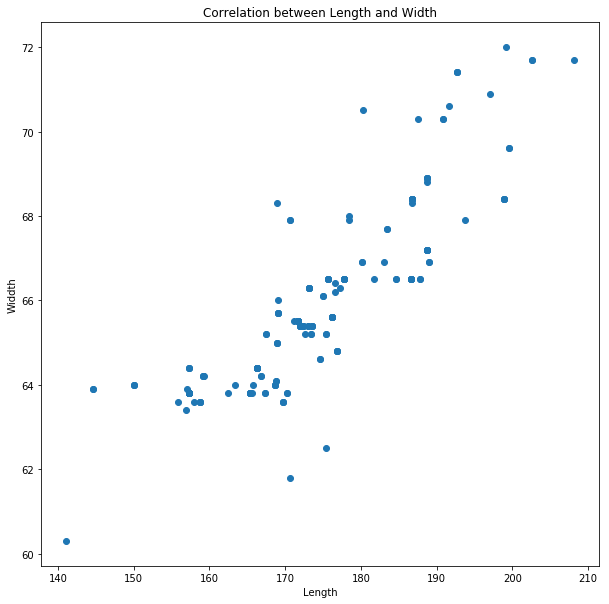

In [14]:
# scatter plot to show different relationship between lenght and width (not based on averages per previous diagram)
fig = plt.figure(figsize=(10, 10))
plt.scatter(automobile_data['length'], automobile_data['width'])

plt.title('Correlation between Length and Width')
# adding label for the x-axis
plt.xlabel('Length')
# adding label for the y-axis
plt.ylabel('Widdth')

# reveals a bit of scatter but that is quite some strong correlation between average length and width of cars of different brands

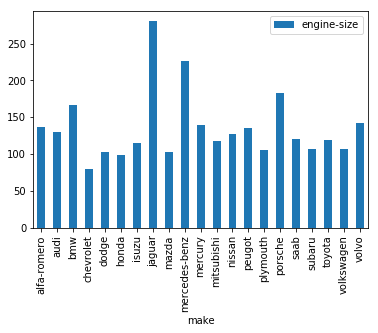

In [15]:
# bar plot to show different makes average engine sizes

features_of_interest2 = pd.DataFrame({'engine-size': group_by_make_average['engine-size'],
                                     }
                                   )
features_of_interest2.plot(kind='bar')

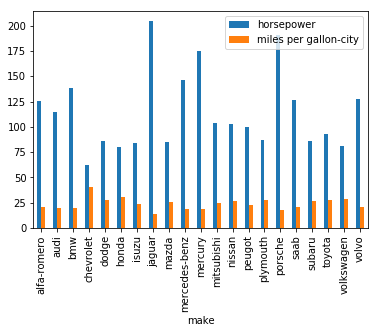

In [16]:
# bar plot to show different makes average horsepower vs miles per gallon in city
features_of_interest3 = pd.DataFrame({'horsepower': group_by_make_average['horsepower'],
                                     'miles per gallon-city': group_by_make_average['city-mpg'],
                                   }
                                   )
features_of_interest3.plot(kind='bar')


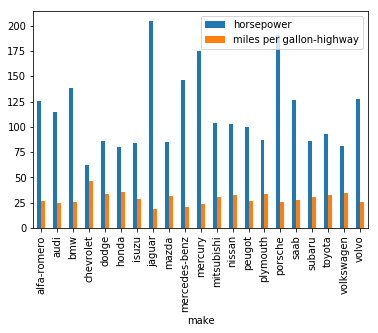

In [31]:
# bar plot to show different makes average horsepower vs miles per gallon on highway

features_of_interest3 = pd.DataFrame({'horsepower': group_by_make_average['horsepower'],
                                     'miles per gallon-highway': group_by_make_average['highway-mpg'],
                                   }
                                   )
features_of_interest3.plot(kind='bar')

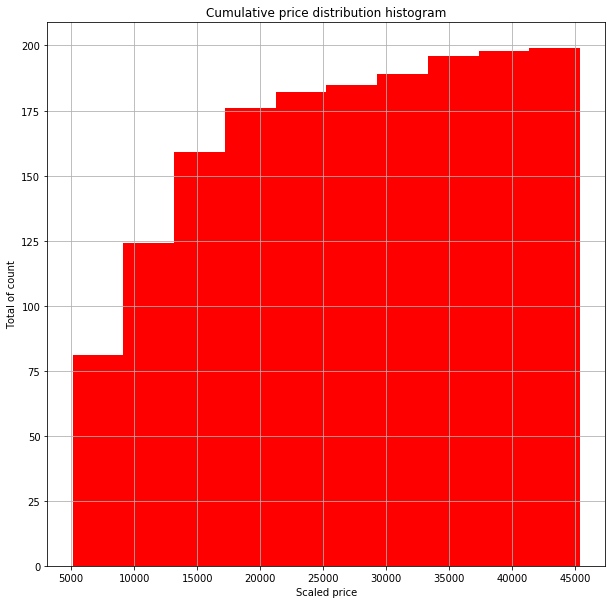

In [18]:
fig = plt.figure(figsize=(10, 10))
# scaling data as the histogram was overflooded
from mlxtend.preprocessing import minmax_scaling
scaled_data = minmax_scaling(automobile_data['price'], columns = [0])

# creating cumulative histogram to show price range for all data in the dataframe
plt.hist(automobile_data['price'], facecolor='r', align = 'mid', cumulative = True)

# Adding label for the x-axis
plt.xlabel('Scaled price')
# Adding label for the y-axis
plt.ylabel('Total of count')
# Adding a title for the graph
plt.title('Cumulative price distribution histogram')
plt.grid(True)
plt.show()

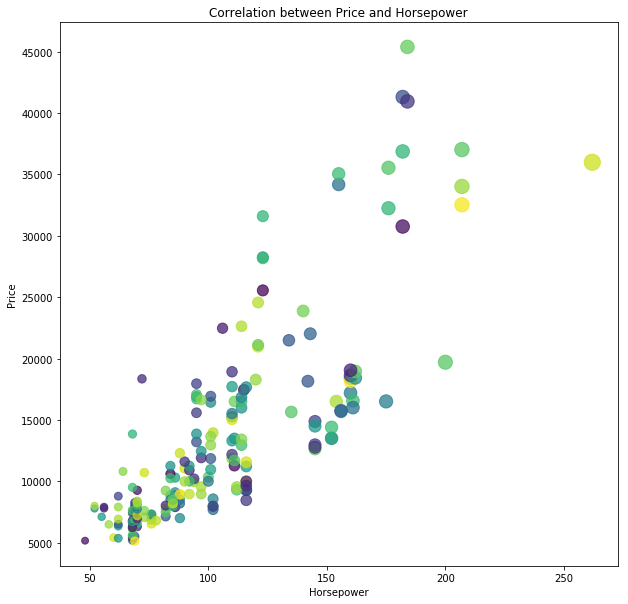

In [19]:
fig = plt.figure(figsize=(10, 10))
N =  199
# colors added at random for different observations
colors = np.random.rand(N)
 
area = automobile_data['horsepower'] # circle size increases as horsepower increases 

plt.title('Correlation between Price and Horsepower')
# adding label for the x-axis
plt.xlabel('Horsepower')
# adding label for the y-axis
plt.ylabel('Price')
# calling scattergraph with x as enginesize and y as horsepower, s set to area which is based on hp of vehicle, colors based on colors varaible (size 199) and transparency set to 0.75 (more opaqua)
plt.scatter(automobile_data['horsepower'], automobile_data['price'] , s = area, c=colors, alpha= 0.75)
# calling function to show the graph
plt.show()

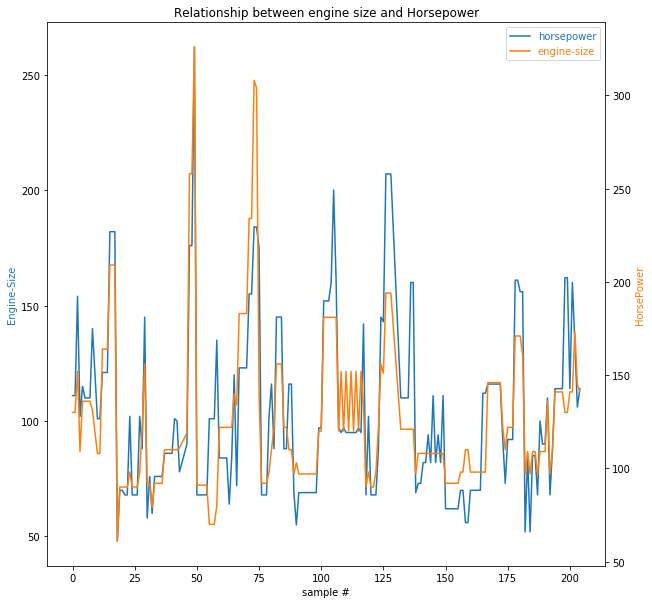

In [20]:
# parasite graph with horsepower and enginesize based on each sample in the 199 rows of data
# importing additional function to create the additional border/axis
from mpl_toolkits.axes_grid1 import host_subplot

fig = plt.figure(figsize=(10, 10))

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("sample #")

host.set_ylabel("Engine-Size")

par.set_ylabel("HorsePower")

# creating host graph with label (top right of graph - Length)
p1, = host.plot(automobile_data['horsepower'], label= "horsepower")
# creating parasite graph with label (top right of graph - Width)
p2, = par.plot(automobile_data['engine-size'], label= "engine-size")

# legend stored in variable
leg = plt.legend()
plt.title('Relationship between engine size and Horsepower')
# getting label and setting color for host graph
host.yaxis.get_label().set_color(p1.get_color())
# setting legend (inside the box) for host graph with same color as the host graph
leg.texts[0].set_color(p1.get_color())
# getting label and setting color for parasite graph
par.yaxis.get_label().set_color(p2.get_color())
# setting legend (inside the box) for parasite graph with same color as the parasite graph
leg.texts[1].set_color(p2.get_color())

plt.show()


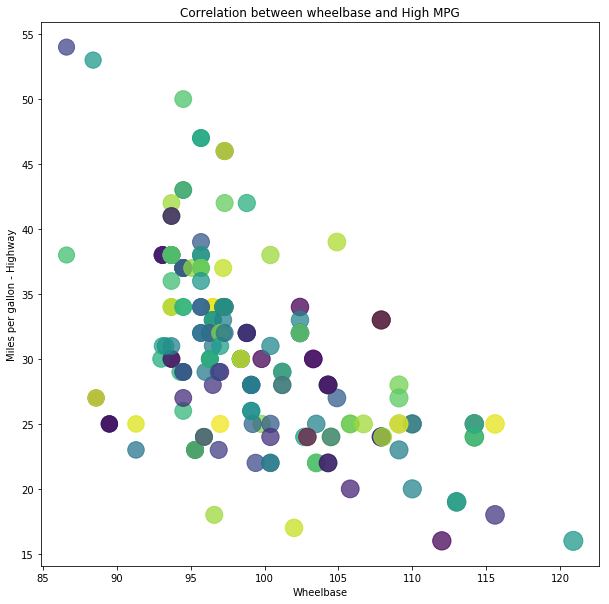

In [22]:
fig = plt.figure(figsize=(10, 10))
N =  199
# colors added at random for different observations
colors = np.random.rand(N)
# defining area which will determine bubble size based on the weight of the sample 
area = automobile_data['wheel-base'] * 3 # circle size increases as wheelbase increases
plt.title('Correlation between wheelbase and High MPG')

plt.xlabel('Wheelbase')

plt.ylabel('Miles per gallon - Highway')
# calling scattergraph with x as wheel-base and y as highway-mpg, s set to area which is based on wheelbase of vehicle, colors based on colors varaible (size 199)
plt.scatter(automobile_data['wheel-base'], automobile_data['highway-mpg'] , s = area, c=colors, alpha= 0.75)
# calling function to show the graph
plt.show()

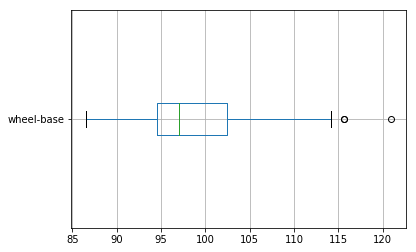

In [23]:
# Creating boxplot to show some outliers for wheelbase
automobile_data.boxplot(column=["wheel-base"], vert = False)

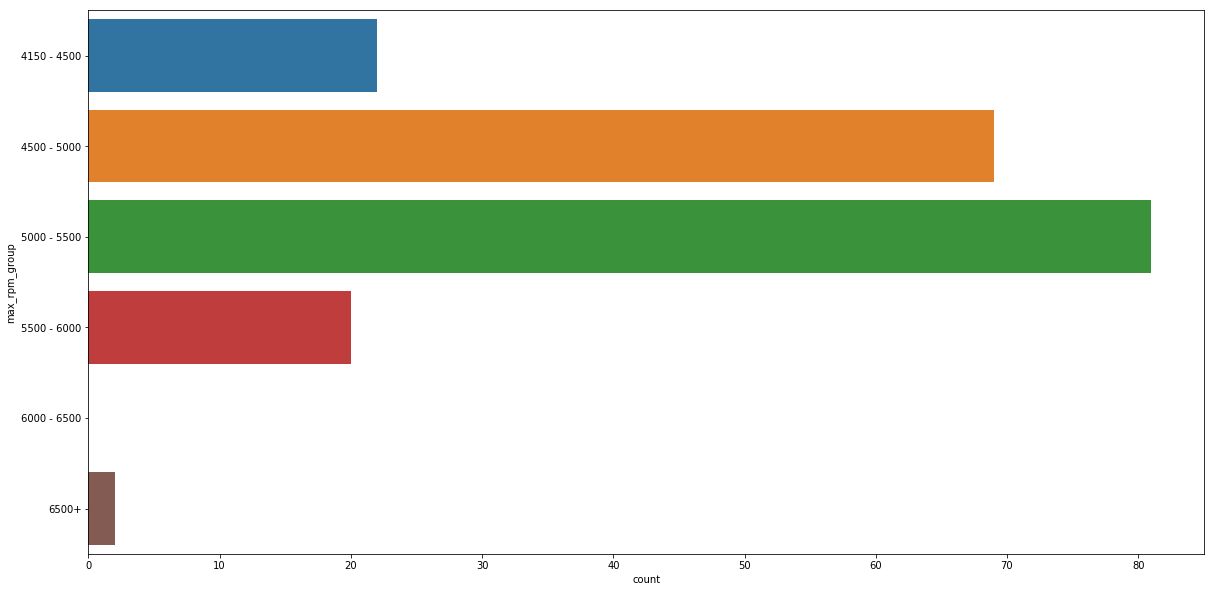

In [24]:
# grouped count-gtaph to show what peak rpm categories there was within the dataset
automobile_data['peak-rpm'] = automobile_data['peak-rpm'].astype(np.int64)

automobile_data['max_rpm_group'] = pd.cut(automobile_data['peak-rpm'], [4150, 4500, 5000, 5500, 6000 , 6500, 7000], 
                   labels=['4150 - 4500', '4500 - 5000', '5000 - 5500','5500 - 6000','6000 - 6500', '6500+'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=automobile_data['max_rpm_group'], data=automobile_data);

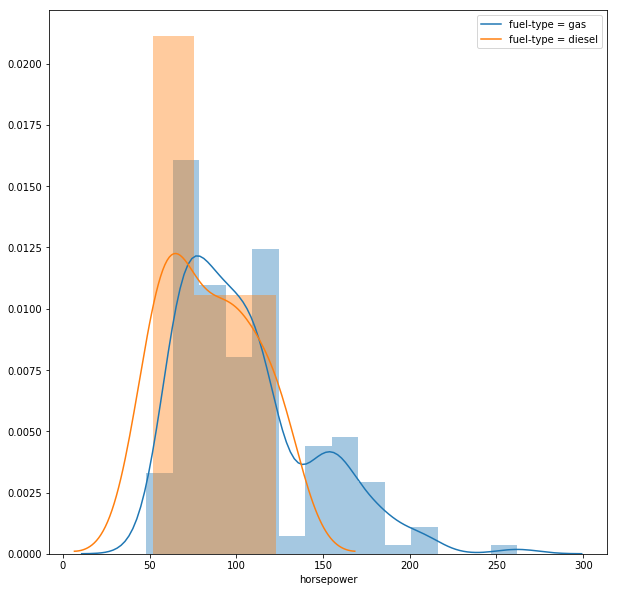

In [33]:
automobile_data['fuel-type'].unique()

# distribution graph of diesel and gas vehicles based on horsepower delivery
fig = plt.figure(figsize=(10, 10))
sns.distplot(automobile_data[automobile_data['fuel-type'] == "gas"]['horsepower'], kde_kws={'label': 'fuel-type = gas'});
sns.distplot(automobile_data[automobile_data['fuel-type'] == "diesel"]['horsepower'], kde_kws={'label': 'fuel-type = diesel'});
#plt.show()

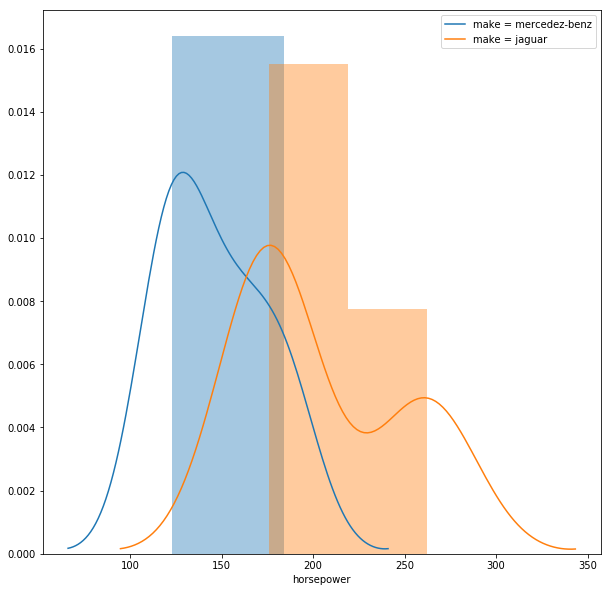

In [34]:
automobile_data['make'].unique()

# distribution graph of mercedez and jaguar based on horsepower delivery

fig = plt.figure(figsize=(10, 10))
sns.distplot(automobile_data[automobile_data['make'] == "mercedes-benz"]['horsepower'], kde_kws={'label': 'make = mercedez-benz'});
sns.distplot(automobile_data[automobile_data['make'] == "jaguar"]['horsepower'], kde_kws={'label': 'make = jaguar'});
plt.show()

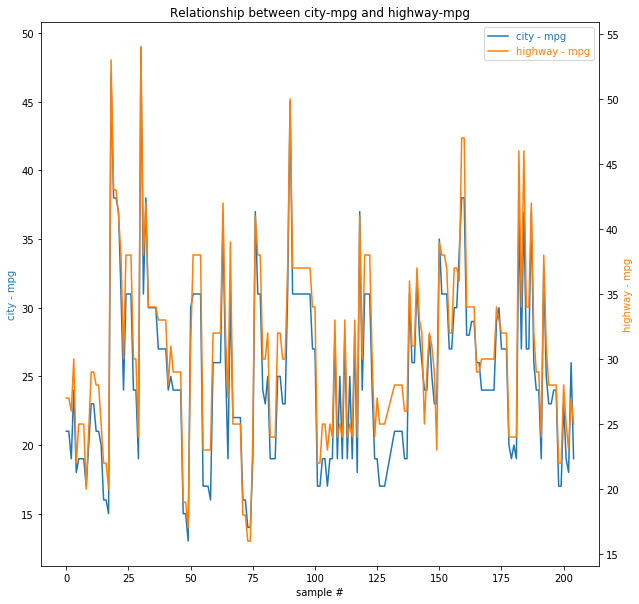

In [35]:
# parasite graph with mpg-city and mpg-highway parameters
fig = plt.figure(figsize=(10, 10))
# subplot for host graph (1 row, 1 column, plot# 1)
host = host_subplot(111)
# ensuring two y-axis are on the graph
par = host.twinx()

host.set_xlabel("sample #")
# creating label for normal y axis host (city-mpg)
host.set_ylabel("city - mpg")
# creating label for parasite axis (highway-mpg)
par.set_ylabel("highway - mpg")


p1, = host.plot(automobile_data['city-mpg'], label= "city - mpg")

p2, = par.plot(automobile_data['highway-mpg'], label= "highway - mpg")

# legend stored in variable
leg = plt.legend()
plt.title('Relationship between city-mpg and highway-mpg')
# getting label and setting color for host graph
host.yaxis.get_label().set_color(p1.get_color())
# setting legend (inside the box) for host graph with same color as the host graph
leg.texts[0].set_color(p1.get_color())
# getting label and setting color for parasite graph
par.yaxis.get_label().set_color(p2.get_color())
# setting legend (inside the box) for parasite graph with same color as the parasite graph
leg.texts[1].set_color(p2.get_color())
# calling show function to display the graph
plt.show()


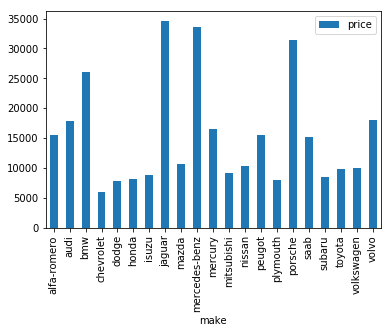

In [30]:
features_of_interest4 = pd.DataFrame({'price': group_by_make_average['price']
                                   })
features_of_interest4.plot(kind='bar')